# Working with the dataset
The dataset covers diamond prices over 50,000 diamonds. I retrieved the dataset from [Kaggle](https://www.kaggle.com/code/khushipitroda/diamonds-prices-of-over-50-000-round-cut-diamonds) before it got set to private. 

### Check data types

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 

# Importing necessary libraries for data splitting and modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# navigate to this file path to get and read the csv file. 
test_path = 'data/diamond_prices.csv'
read_data = pd.read_csv(test_path)

# check the data type of each column
column_data_types = read_data.dtypes

# print the data types
column_data_types

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

## Check for errors

In [19]:
# Checking for missing values

missing_values = read_data.isnull().sum()
missing_values

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [20]:
# Checking for duplicate values
duplicate_rows = read_data.duplicated().sum()
duplicate_rows

0

### Summary Statistics

Performed on all columns.

In [21]:
# summary statistics of all columns stored as the variable summary_statistics
summary_statistics = read_data.describe(include='all')

# print summary statistics
summary_statistics


,carat,cut,color,clarity,depth,table,price,x,y,z
count,500.000000,500,500,500,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,E,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,152,122,158,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.636120,NaN,NaN,NaN,61.712800,57.800000,2233.498000,5.430920,5.42904,3.350320
std,0.216409,NaN,NaN,NaN,1.727346,2.411122,996.584949,0.724725,0.71263,0.448653
min,0.200000,NaN,NaN,NaN,53.100000,52.000000,326.000000,3.790000,3.75000,2.270000
25%,0.527500,NaN,NaN,NaN,60.900000,56.000000,2759.000000,5.197500,5.21750,3.187500
50%,0.710000,NaN,NaN,NaN,61.800000,58.000000,2782.000000,5.730000,5.72000,3.530000
75%,0.750000,NaN,NaN,NaN,62.700000,59.000000,2804.000000,5.850000,5.86000,3.610000


### Summary Statistics
Performed on columns that have numerical data.  

In [22]:
# Summary statistics of columns with numerical data. Setting the function to variable numerical_summary_statistics
numerical_summary_statistics = read_data.describe()

# print numerical_summry_statistics 
numerical_summary_statistics

,carat,depth,table,price,x,y,z
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000
mean,0.636120,61.712800,57.800000,2233.498000,5.430920,5.42904,3.350320
std,0.216409,1.727346,2.411122,996.584949,0.724725,0.71263,0.448653
min,0.200000,53.100000,52.000000,326.000000,3.790000,3.75000,2.270000
25%,0.527500,60.900000,56.000000,2759.000000,5.197500,5.21750,3.187500
50%,0.710000,61.800000,58.000000,2782.000000,5.730000,5.72000,3.530000
75%,0.750000,62.700000,59.000000,2804.000000,5.850000,5.86000,3.610000
max,1.200000,68.100000,70.000000,2822.000000,6.830000,6.90000,4.330000


### Categorical Distribution
Display the frequencies of the variables `cut`, `color`, and `clarity`.

In [23]:

# Distribution of the `cut`, `color` and `clarity` columns
cut_distribution = read_data['cut'].value_counts()
color_distribution = read_data['color'].value_counts()
clarity_distribution = read_data['clarity'].value_counts()

# Format cut_distribution, color_distribution and clarity_distribution

# Create separate DataFrames for each categorical distribution.
cut_distribution_df = cut_distribution.reset_index().rename(columns={'index': 'Cut', 'cut': 'cut'})
color_distribution_df = color_distribution.reset_index().rename(columns={'index': 'Color', 'color': 'color'})
clarity_distribution_df = clarity_distribution.reset_index().rename(columns={'index': 'Clarity', 'clarity': 'clarity'})

# Print all distributions, replace NaN in the table with an empty space
combined_distribution_df = pd.concat([cut_distribution_df, color_distribution_df, clarity_distribution_df], axis=1)
combined_distribution_df = combined_distribution_df.fillna('')
combined_distribution_df

,cut,count,color,count,clarity,count
0,Ideal,152.0,E,122.0,SI1,158
1,Premium,144.0,F,105.0,VS2,117
2,Very Good,127.0,G,74.0,VS1,79
3,Good,51.0,H,67.0,SI2,71
4,Fair,26.0,D,59.0,VVS1,29
5,,,I,50.0,VVS2,28
6,,,J,23.0,I1,11
7,,,,,IF,7


### Visualize categorical distributions

- Distribution of Cut: The bar chart shows the frequencies of different cut categories.
- Distribution of Color: The frequencies of different color categories are displayed.
- Distribution of Clarity: The chart illustrates the distribution of clarity categories.

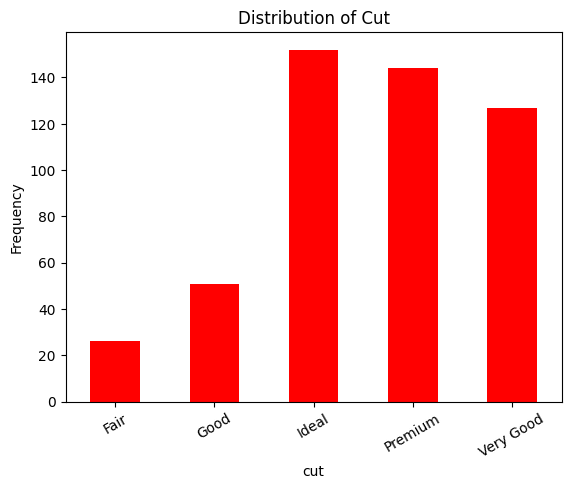

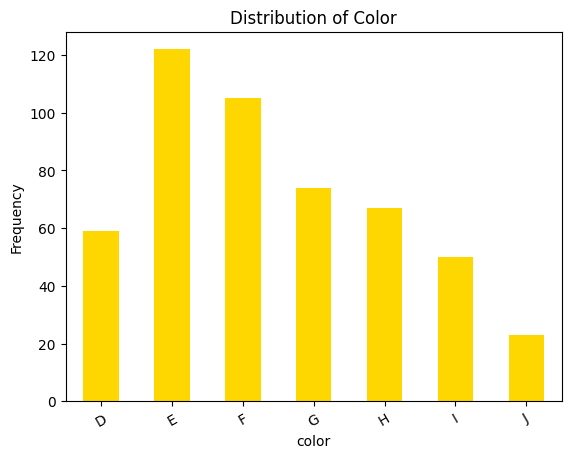

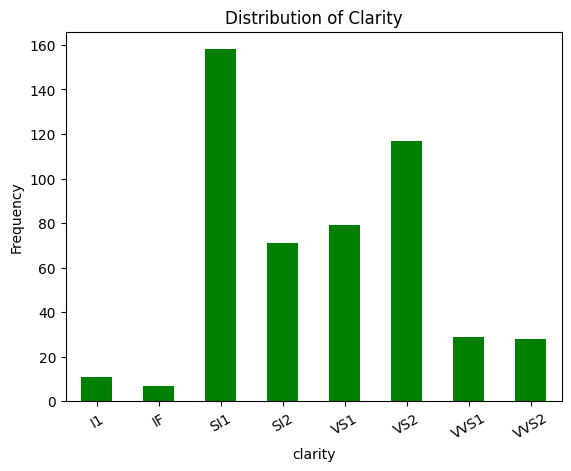

In [24]:
# Function to plot the distribution of categorical features with colors
def plot_categorical_distribution(series, title, colors):
    series.value_counts().sort_index().plot(kind='bar', color=colors)
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xticks(rotation=30)
    plt.show()

# Changing colors of the bars to make them distinct 
colors_for_cut = ['red']
colors_for_color = ['gold']
colors_for_clarity = ['green']

# Plotting the distribution for 'cut', 'color', and 'clarity'
plot_categorical_distribution(read_data['cut'], 'Distribution of Cut', colors_for_cut)
plot_categorical_distribution(read_data['color'], 'Distribution of Color', colors_for_color)
plot_categorical_distribution(read_data['clarity'], 'Distribution of Clarity', colors_for_clarity)



# Does diamond carat have any effect on diamond prices?

1. Calculating the mean absolute error: 329.89
2. Calculating the mean squared error: 196,983.08
3. Calculating R-squared: 0.836 which suggests a strong positive relationship between 'carat' and 'price'.

In [25]:
# Visualizing the linear relationship between carat and diamond price

# First, data splitting and modeling. 
# Select 'carat' and 'price' fields
X = read_data[['carat']]
y = read_data['price']


# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Fit model into training data
model.fit(X_train, y_train)

# Predicting the 'price' for the testing set
y_pred = model.predict(X_test)

# Calculating evaluation metrics 
mean_abs_error = mean_absolute_error(y_test, y_pred)
mean_sq_error = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mean_abs_error, mean_sq_error, r2

(329.88956378885564, 196983.0752768674, 0.8358697717140943)

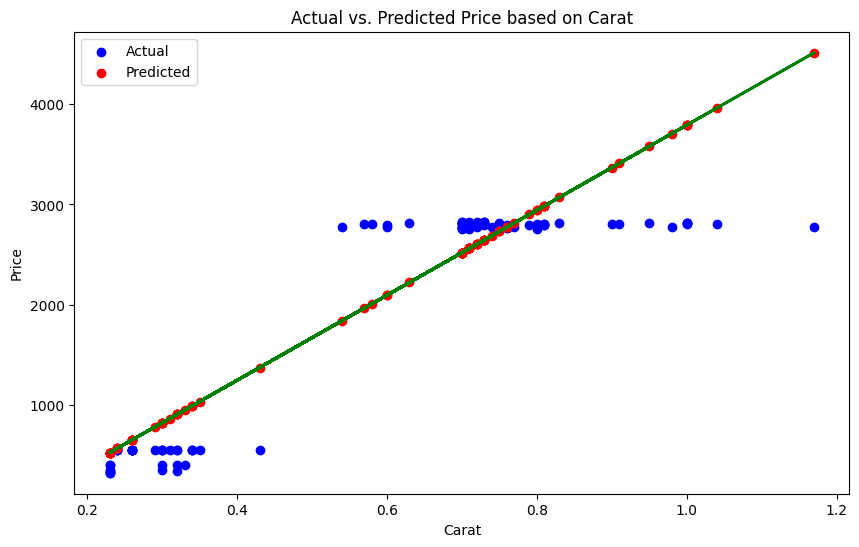

In [26]:
# Visualize the relationship between 'carat' and 'price'

plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.title('Actual vs. Predicted Price based on Carat')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()